## Creating CNN Using Scratch And Transfer Learning

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [10]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'


In [17]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [18]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [19]:
  # useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [20]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [21]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [22]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [23]:

# view the structure of the model
model.summary()


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [24]:
from keras.layers import MaxPooling2D

In [25]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 50176)            

In [26]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [27]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [28]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [29]:
training_set

In [30]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [32]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Epoch 1/50
13/13 [==============================] - 58s 4s/step - loss: 1.0522 - accuracy: 0.5000 - val_loss: 0.5365 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 21s 2s/step - loss: 0.7026 - accuracy: 0.5288 - val_loss: 0.6710 - val_accuracy: 0.6791
Epoch 3/50
13/13 [==============================] - 23s 2s/step - loss: 0.6694 - accuracy: 0.5337 - val_loss: 0.6068 - val_accuracy: 0.6791
Epoch 4/50
13/13 [==============================] - 22s 2s/step - loss: 0.6205 - accuracy: 0.6731 - val_loss: 0.7622 - val_accuracy: 0.3358
Epoch 5/50
13/13 [==============================] - 24s 2s/step - loss: 0.5503 - accuracy: 0.7091 - val_loss: 0.8261 - val_accuracy: 0.3507
Epoch 6/50
13/13 [==============================] - 22s 2s/step - loss: 0.4616 - accuracy: 0.7572 - val_loss: 0.7570 - val_accuracy: 0.3881
Epoch 7/50
13/13 [==============================] - 22s 2s/step - loss: 0.4302 - accuracy: 0.8005 - val_loss: 0.8734 - val_accuracy: 0.4552
Epoch 8/50
13/13 [=

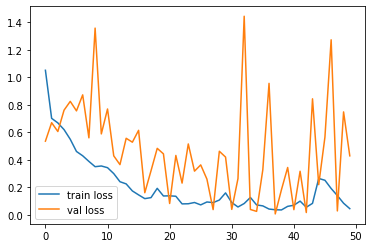

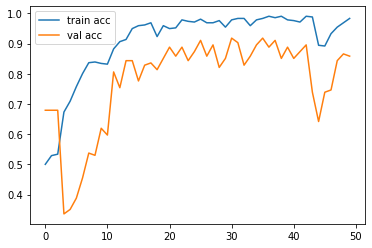

<Figure size 432x288 with 0 Axes>

In [33]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [34]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [35]:

y_pred = model.predict(test_set)


In [36]:
y_pred

array([[9.99988556e-01, 1.14787690e-05],
       [8.28762725e-03, 9.91712332e-01],
       [6.75144494e-01, 3.24855566e-01],
       [1.00000000e+00, 9.06404671e-14],
       [9.99701083e-01, 2.98937841e-04],
       [1.00000000e+00, 8.56549942e-09],
       [1.86155550e-02, 9.81384397e-01],
       [1.00000000e+00, 2.43137759e-08],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.29566289e-17],
       [3.22074816e-03, 9.96779263e-01],
       [1.00000000e+00, 6.12594531e-10],
       [1.00000000e+00, 7.13819892e-10],
       [1.00000000e+00, 1.14698162e-09],
       [1.00000000e+00, 2.35912105e-20],
       [1.00000000e+00, 3.37808099e-23],
       [9.22951400e-02, 9.07704830e-01],
       [9.69325677e-02, 9.03067470e-01],
       [9.54223871e-01, 4.57760841e-02],
       [9.99998450e-01, 1.49186997e-06],
       [1.00000000e+00, 5.53455459e-09],
       [3.37276980e-03, 9.96627212e-01],
       [1.80084735e-01, 8.19915235e-01],
       [2.59668007e-02, 9.74033237e-01],
       [1.000000

In [37]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [38]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0], dtype=int64)

In [39]:
from keras.models import load_model
from keras.preprocessing import image

In [40]:
model=load_model('model_vgg19.h5')

In [44]:
img=image.load_img('Dataset/Test/Uninfected/3.png',target_size=(224,224))



In [45]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [46]:
x.shape

(224, 224, 3)

In [47]:
x=x/255

In [48]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [49]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [50]:
a=np.argmax(model.predict(img_data), axis=1)

In [51]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
